In [2]:
from keras.datasets import mnist
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'keras'

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


### Step 2: Preprocess the Data

In [4]:
# Step 2: Preprocess the Data
# The MNIST dataset needs some preprocessing before it's ready for training. Here are the common steps:

# Normalize the images: The pixel values are between 0 and 255, so we should scale them to the range [0, 1] for easier processing by the model.

# Flatten the images: Since MNIST images are 28x28 pixels, we can flatten each image into a 1D array of 784 pixels for feeding into a neural network model.

# One-hot encoding the labels: The labels should be one-hot encoded so that each label (0-9) is represented by a vector of size 10 (e.g., label 3 would be [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]).

from keras.utils import to_categorical
import numpy as np

# Reshape the data to 1D arrays (28x28 -> 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Normalize the data (scale pixel values to [0, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)  # 10 classes (0-9)
y_test = to_categorical(y_test, 10)

# Check the shape of the data after preprocessing
print(f"Training data shape after preprocessing: {x_train.shape}")
print(f"Test data shape after preprocessing: {x_test.shape}")


Training data shape after preprocessing: (60000, 784)
Test data shape after preprocessing: (10000, 784)


Code to Display MNIST Images:


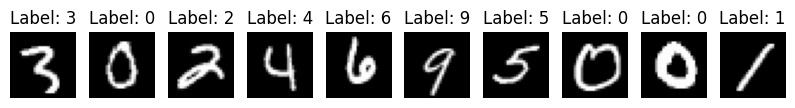

In [10]:
import matplotlib.pyplot as plt

# Select 5 random images from the training set to display
num_samples = 10
random_indices = np.random.choice(x_train.shape[0], num_samples, replace=False)

# Plot the selected images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(x_train[idx].reshape(28, 28), cmap='gray')  # Reshape back to 28x28 for display
    plt.title(f"Label: {np.argmax(y_train[idx])}")
    plt.axis('off')

plt.show()


# Step 3: Build the Model


In [11]:
# tep 3: Build the Model
# We'll use a simple neural network (a fully connected feedforward network) for classifying the MNIST digits. The model will have the following layers:

# Input layer: This will take in the flattened 784 input features (28x28 pixels).

# Hidden layer(s): One or more hidden layers (we'll use one hidden layer for simplicity).

# Output layer: A softmax layer with 10 neurons (one for each digit 0-9).

# Here’s how you can build the model using Keras (TensorFlow):


# Explanation:
# Input layer: The first layer (input_dim=784) accepts 784 input features (flattened 28x28 image).

# Hidden layer: A fully connected layer with 128 neurons and ReLU activation to introduce non-linearity.

# Output layer: A softmax output layer with 10 neurons for the classification of digits (0-9).


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential()

# Add the input layer (784 nodes) and the first hidden layer (128 nodes, ReLU activation)
model.add(Dense(128, input_dim=784, activation='relu'))

# Add the output layer (10 nodes for 10 classes, softmax activation)
model.add(Dense(10, activation='softmax'))

# Summarize the model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Step 4: Compile the Model


In [12]:
# Step 4: Compile the Model
# Next, we compile the model. The compilation step involves specifying the loss function, optimizer, and metrics to monitor during training.

# For multi-class classification problems like MNIST, we use:

# Loss function: categorical_crossentropy (since we have one-hot encoded labels).

# Optimizer: adam (a popular optimizer for deep learning models).

# Metrics: accuracy (to track how well the model is performing during training).


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model


In [13]:
# Step 5: Train the Model
# We'll train the model using the training data (x_train and y_train). We'll specify the number of epochs (iterations over the entire training data) and batch size (how many samples to process before updating the model weights).

# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,  # You can increase this to 10 or more if needed
                    batch_size=32,  # You can adjust the batch size
                    validation_split=0.2,  # Use 20% of the training data for validation
                    verbose=2)  # Shows detailed progress


Epoch 1/5
1500/1500 - 8s - 5ms/step - accuracy: 0.9158 - loss: 0.2917 - val_accuracy: 0.9540 - val_loss: 0.1681
Epoch 2/5
1500/1500 - 10s - 7ms/step - accuracy: 0.9609 - loss: 0.1310 - val_accuracy: 0.9664 - val_loss: 0.1150
Epoch 3/5
1500/1500 - 5s - 3ms/step - accuracy: 0.9731 - loss: 0.0895 - val_accuracy: 0.9717 - val_loss: 0.0980
Epoch 4/5
1500/1500 - 5s - 3ms/step - accuracy: 0.9809 - loss: 0.0659 - val_accuracy: 0.9694 - val_loss: 0.1026
Epoch 5/5
1500/1500 - 7s - 4ms/step - accuracy: 0.9841 - loss: 0.0515 - val_accuracy: 0.9710 - val_loss: 0.0915


# Step 6: Evaluate the Model


In [14]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")


313/313 - 1s - 2ms/step - accuracy: 0.9750 - loss: 0.0784
Test loss: 0.0784088596701622
Test accuracy: 0.9750000238418579


# visualization

## 📌 1. Class Distribution Visualization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert one-hot encoded labels back to integers
y_train_labels = np.argmax(y_train, axis=1)

# Count each digit
class_counts = np.bincount(y_train_labels)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=np.arange(10), y=class_counts, palette="viridis")
plt.title("Class Distribution in Training Data")
plt.xlabel("Digit Class")
plt.ylabel("Number of Samples")
plt.show()


NameError: name 'y_train' is not defined